# Predicting price of bulldozers using machine learning

## 1. Problem definition
   > Predict the auction sale price for a piece of heavy equipment to create a "blue book" for bulldozers
    

## 2. Data
   Data is downloaded from the kaggle bluebook for bulldozers competition:
   
   * Train.csv is the training set, which contains data through the end of 2011.

   * Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.

   * Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation
   The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.
  
  for more info:
  https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

## 4. Features
kaggle provides a data dictionary to view the feature. 
or
You can view it on:
https://docs.google.com/spreadsheets/d/1X5mxbGOKI8b24Gqq5TfIICpCyhnb0O24noSASXOJ9Ho/edit?usp=sharing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
#importing data
df = pd.read_csv("data/TrainAndValid.csv", low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

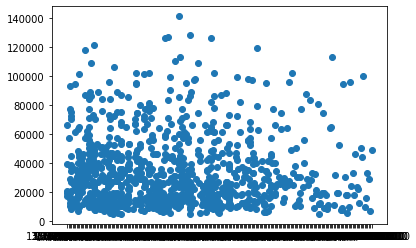

In [5]:
fig, ax = plt.subplots()
ax.scatter(df.saledate[:1000], df.SalePrice[:1000])

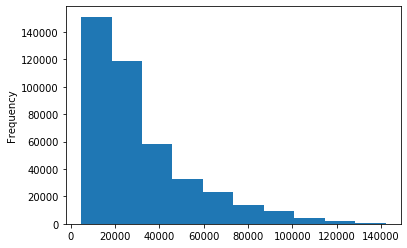

In [6]:
df.SalePrice.plot.hist()

## Parsing dates


In [7]:
df = pd.read_csv("data/TrainAndValid.csv", low_memory=False, parse_dates=["saledate"])

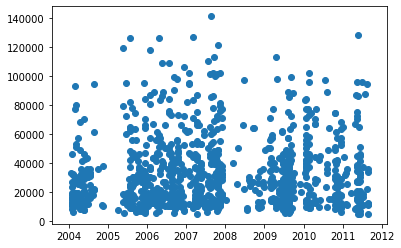

In [8]:
fig, ax = plt.subplots()
ax.scatter(df.saledate[:1000], df.SalePrice[:1000])

In [9]:
## sort dataframe by saledate
##when working with timeseries its a good idea to sort by date
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [10]:
## make a copu
df_tmp = df.copy()

## add datatime parameters for `saledate` column

In [11]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear

In [12]:
 #since we've enriched the df with date time features we can remove saledate
df_tmp.drop("saledate", axis=1, inplace=True)

In [13]:
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 5. Modelling

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
model = RandomForestRegressor(n_jobs=-1, random_state=69)
#-1 basically means it'll use as many cores that are available in the current system

In [16]:
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)


UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [29]:
# we need to change all the string type as categories
cateName = {}
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()
        cateName[label] = "category"

print(cateName)

{'UsageBand': 'category', 'fiModelDesc': 'category', 'fiBaseModel': 'category', 'fiSecondaryDesc': 'category', 'fiModelSeries': 'category', 'fiModelDescriptor': 'category', 'ProductSize': 'category', 'fiProductClassDesc': 'category', 'state': 'category', 'ProductGroup': 'category', 'ProductGroupDesc': 'category', 'Drive_System': 'category', 'Enclosure': 'category', 'Forks': 'category', 'Pad_Type': 'category', 'Ride_Control': 'category', 'Stick': 'category', 'Transmission': 'category', 'Turbocharged': 'category', 'Blade_Extension': 'category', 'Blade_Width': 'category', 'Enclosure_Type': 'category', 'Engine_Horsepower': 'category', 'Hydraulics': 'category', 'Pushblock': 'category', 'Ripper': 'category', 'Scarifier': 'category', 'Tip_Control': 'category', 'Tire_Size': 'category', 'Coupler': 'category', 'Coupler_System': 'category', 'Grouser_Tracks': 'category', 'Hydraulics_Flow': 'category', 'Track_Type': 'category', 'Undercarriage_Pad_Width': 'category', 'Stick_Length': 'category', 'Thu

In [18]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [19]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [20]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [21]:
df_tmp.head(10)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31
54653,1301884,23500.0,1182999,4123,132,99.0,1976,NaN,NaN,D6C,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
81383,1379228,31000.0,1082797,7620,132,99.0,1986,NaN,NaN,IT12,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
204924,1645390,11750.0,1527216,8202,132,99.0,1970,NaN,NaN,544,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
135376,1493279,63000.0,1363756,2759,132,99.0,1987,NaN,NaN,D5HII,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,1989,1,31,1,31
113390,1449549,13000.0,1289412,3356,132,99.0,1966,NaN,NaN,12F,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31


## Save export current processed data

In [30]:
df_tmp.to_csv("data/train_tmp.csv", index=False)

In [31]:
df_tmp = pd.read_csv("data/train_tmp.csv", low_memory=False, dtype=cateName)

In [60]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [32]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 59 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   SalesID                              412698 non-null  int64   
 1   SalePrice                            412698 non-null  float64 
 2   MachineID                            412698 non-null  int64   
 3   ModelID                              412698 non-null  int64   
 4   datasource                           412698 non-null  int64   
 5   auctioneerID                         412698 non-null  float64 
 6   YearMade                             412698 non-null  int64   
 7   MachineHoursCurrentMeter             412698 non-null  float64 
 8   UsageBand                            73670 non-null   category
 9   fiModelDesc                          412698 non-null  category
 10  fiBaseModel                          412698 non-null  category
 11  

## Fill missing values

### numeric ones first

In [33]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [34]:
#fill numeric rows with median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #add a binary column which tells us if the data is missing or not
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            #fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median())

In [35]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [36]:
df_tmp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

## filling and turning categorical variables into numbers


In [37]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        #tuen categories into numbers and add +1,(because col with missing value has cat code as -1 so we need to make that 0)
        df_tmp[label] = pd.Categorical(content).codes + 1 

In [38]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [39]:
%%time
model = RandomForestRegressor(n_jobs=-1, random_state=69)
model.fit(df_tmp.drop("SalePrice", axis=1),df_tmp["SalePrice"])

CPU times: user 27min 3s, sys: 14.1 s, total: 27min 17s
Wall time: 8min 32s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=69, verbose=0, warm_start=False)

In [40]:
model.score(df_tmp.drop("SalePrice", axis=1),df_tmp["SalePrice"])

0.9876095059066801

## Splitting data into training and validation sets

split data into train and validation

In [41]:
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_train), len(df_val)

(401125, 11573)

In [43]:
x_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
x_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]

## Building our own evaluation function

In [44]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

#create a function to evaluate model on different levels
def show_score(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_valid)
    
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
             "Valid MAE": mean_absolute_error(y_valid, val_preds),
             "Training RMSLE": rmsle(y_train, train_preds),
             "Valid RMSLE": rmsle(y_valid, val_preds),
             "Training score": r2_score(y_train, train_preds),
             "Valid score": r2_score(y_valid, val_preds)}
    return scores
    

## Testing our model on a subset

In [46]:
#this takes far too long
#model = RandomForestRegressor(n_jobs=-1, random_state=69)
#model.fit(x_train, y_train)

In [47]:
#change max_samples value
model = RandomForestRegressor(n_jobs=-1, random_state=69, max_samples=10000)

In [48]:
%%time
model.fit(x_train, y_train)

CPU times: user 51.5 s, sys: 1.01 s, total: 52.5 s
Wall time: 17.8 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=10000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=69, verbose=0, warm_start=False)

In [49]:
show_score(model)

{'Training MAE': 5554.7287133686505,
 'Valid MAE': 7167.441519052968,
 'Training RMSLE': 0.2574863273368487,
 'Valid RMSLE': 0.2935640874714954,
 'Training score': 0.86101533629751,
 'Valid score': 0.8329463360814856}

In [51]:
%%time
## Hyperparameter tuning using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators": np.arange(10, 100, 10),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2),
          "max_features": [0.5, 1, "sqrt", "auto"],
          "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=69), rf_grid, cv=5, n_iter=2, verbose=True)
#fit the model
rs_model.fit(x_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.9min finished


CPU times: user 54.4 s, sys: 7.52 s, total: 1min 1s
Wall time: 2min 1s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [52]:
show_score(rs_model)

{'Training MAE': 7057.828926787171,
 'Valid MAE': 8229.512634784356,
 'Training RMSLE': 0.3135289948407196,
 'Valid RMSLE': 0.3315855614349343,
 'Training score': 0.7878687956962556,
 'Valid score': 0.78578654762567}

In [53]:
%%time
#after doing 100 iterations
model = RandomForestRegressor(n_jobs=-1,
                             random_state=69,
                             n_estimators=40,
                             min_samples_split=14,
                             min_samples_leaf=1,
                             max_features=0.5, max_samples=None)

model.fit(x_train, y_train)

CPU times: user 4min 39s, sys: 4.35 s, total: 4min 44s
Wall time: 1min 52s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=14, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=-1, oob_score=False,
                      random_state=69, verbose=0, warm_start=False)

In [54]:
show_score(model)

{'Training MAE': 2948.430573252706,
 'Valid MAE': 5940.492994228834,
 'Training RMSLE': 0.14432392169454122,
 'Valid RMSLE': 0.24591864562715962,
 'Training score': 0.9590579495764435,
 'Valid score': 0.8823697569318704}

## Make predictions on test set

In [55]:
df_test = pd.read_csv("data/Test.csv", low_memory=False,
                     parse_dates=["saledate"],
                     dtype=cateName)

In [56]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   category      
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  category      
 10  fiBaseModel               12457 non-null  category      
 11  fiSecondaryDesc           8482 non-null   category      
 12  fiModelSeries     

In [58]:
# preprocessing test set data
def preprocess_data(df):
    """
    Performs transformation on df and returns transformed df.
    """
    df.sort_values(by=["saledate"], inplace=True, ascending=True)
    df_tmp = df.copy()
    
    df_tmp["saleYear"] = df_tmp.saledate.dt.year
    df_tmp["saleMonth"] = df_tmp.saledate.dt.month
    df_tmp["saleDay"] = df_tmp.saledate.dt.day
    df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
    df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear
    
    #since we've enriched the df with date time features we can remove saledate
    df_tmp.drop("saledate", axis=1, inplace=True)
    
    #fill numeric rows with median
    for label, content in df_tmp.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                #add a binary column which tells us if the data is missing or not
                df_tmp[label+"_is_missing"] = pd.isnull(content)
                #fill missing numeric values with median
                df_tmp[label] = content.fillna(content.median())
    #fill missing categorical data and convert into numbers            
    for label, content in df_tmp.items():
        if not pd.api.types.is_numeric_dtype(content):
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            #turn categories into numbers and add +1,(because col with missing value has cat code as -1 so we need to make that 0)
            df_tmp[label] = pd.Categorical(content).codes + 1
    
    return df_tmp

In [59]:
proc_test = preprocess_data(df_test)

In [60]:
# we can find how the columns differ through sets
set(x_train.columns) - set(proc_test.columns)

{'auctioneerID_is_missing'}

In [61]:
#manually add them , cause its not missing
proc_test["auctioneerID_is_missing"] = False

In [62]:
test_preds = model.predict(proc_test)

In [63]:
#formart predictions as kaggle wants it
df_preds = pd.DataFrame()
df_preds["SalesID"] = proc_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
1408,4317459,14819.616561
1023,4249784,18776.015358
1728,4392603,26354.287121
1167,4274831,30409.296703
1594,4362801,24610.470867
...,...,...
9941,6620191,18898.363539
9936,6620142,21463.180247
11620,6635116,44824.132365
9995,6621460,43712.761226


In [65]:
df_preds.to_csv("data/test_predictions.csv", index=False)

In [66]:
model.feature_importances_

array([3.45169119e-02, 1.65727749e-02, 4.11521508e-02, 1.89242174e-03,
       3.33029364e-03, 2.00111510e-01, 3.16015700e-03, 1.01583849e-03,
       3.81199353e-02, 4.66946634e-02, 6.74082539e-02, 5.02713459e-03,
       2.02547908e-02, 1.48941634e-01, 4.34186976e-02, 5.94806610e-03,
       3.20066128e-03, 2.51317436e-03, 3.37607492e-03, 6.63409587e-02,
       4.24274718e-04, 6.16634624e-05, 8.92535728e-04, 1.71338017e-04,
       9.58226096e-04, 3.07683703e-05, 4.90202174e-04, 8.27521050e-03,
       1.09249446e-03, 2.38308100e-03, 2.52692271e-03, 2.16044744e-03,
       3.99746762e-03, 5.90919854e-04, 4.72524772e-03, 1.25581026e-02,
       8.87108799e-04, 9.15996988e-03, 1.78660318e-03, 2.14714604e-03,
       1.57569258e-03, 7.23341460e-04, 4.88189752e-03, 6.38841650e-04,
       8.00509903e-04, 3.57298061e-04, 4.16869992e-04, 2.04585620e-03,
       1.06768003e-03, 2.10310096e-04, 1.18590734e-03, 7.32854667e-02,
       3.86821480e-03, 5.66339293e-03, 2.92692131e-03, 9.74238270e-03,
      

In [74]:
#helper plot function
def plot_features(columns, importance, n=20):
    df = (pd.DataFrame({"features": columns,
                       "feature_importance": importance}).sort_values("feature_importance", ascending=False)
         .reset_index(drop=True))
    
    #plot
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importance"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

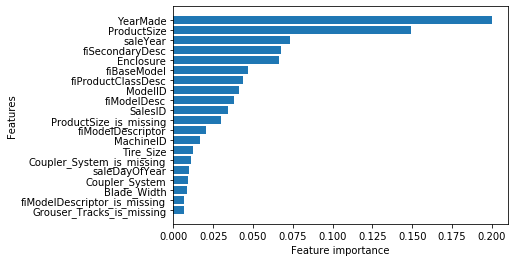

In [75]:
plot_features(x_train.columns, model.feature_importances_)